<a href="https://colab.research.google.com/github/park-geun-hyeong/Dacon/blob/main/Computer_vision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data 확인


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from tqdm import tqdm
import os
import cv2

In [2]:
path='/content/drive/MyDrive/Dacon/computer_vision1/'

train=pd.read_csv(path+'train.csv')
test=pd.read_csv(path+'test.csv')
submission = pd.read_csv(path+'submission.csv')

In [3]:
train

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,1,2,1,3,3,4,4,3,4,1,0,4,4,4,1,1,1,2,3,4,1,2,3,3,2,3,1,3,4,0,...,2,4,1,1,1,1,2,3,1,2,0,2,4,1,0,3,4,4,0,1,3,3,3,3,2,0,3,3,3,2,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,1,4,2,0,3,3,2,2,1,2,3,2,2,4,1,0,4,1,0,2,0,3,0,2,3,3,3,4,0,4,...,0,1,1,1,1,3,0,4,2,0,4,3,1,4,0,1,0,0,3,3,0,0,1,3,3,1,2,0,3,2,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,4,3,4,0,1,3,4,1,0,2,2,0,0,3,3,2,0,4,3,2,3,4,3,1,1,4,4,4,1,1,...,3,2,4,3,2,1,1,0,4,0,4,4,1,3,3,1,3,4,1,0,2,4,1,2,4,4,4,3,4,2,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,3,0,1,4,0,0,0,2,3,1,1,1,0,2,4,1,0,3,0,1,2,4,1,4,3,1,4,4,4,0,...,0,0,2,0,2,3,2,0,3,0,1,0,1,0,1,2,3,2,1,1,0,0,3,1,4,1,1,2,1,3,2,3,1,1,0,4,1,4,3,1


In [4]:
test

,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,1,0,0,2,4,3,2,0,1,3,1,1,0,2,0,4,4,2,3,0,2,2,2,2,1,3,2,2,4,1,...,1,4,4,2,1,3,4,2,3,2,4,2,3,1,1,3,2,4,3,1,2,1,3,0,4,2,2,1,1,4,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,4,3,2,3,3,2,2,0,0,0,2,4,3,0,2,0,2,4,2,3,3,1,4,2,2,3,2,2,2,0,...,1,1,0,2,1,4,4,4,0,1,2,4,4,4,1,2,4,2,1,4,1,0,1,0,4,2,0,0,3,4,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,4,4,1,0,0,1,2,1,2,2,0,3,0,4,0,2,3,3,4,1,2,0,1,2,4,3,1,3,3,1,...,1,3,3,2,1,3,0,3,2,3,2,4,2,0,4,2,2,2,1,1,0,3,0,2,1,4,3,2,3,4,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,1,2,2,3,1,2,3,4,1,3,1,0,3,3,1,2,4,3,4,1,0,0,1,1,0,4,1,3,2,2,...,0,4,0,2,4,2,1,3,2,0,1,3,0,4,1,4,2,3,3,2,2,1,4,2,0,3,0,3,2,4,2,0,0,4,3,3,3,4,4,2


In [5]:
submission # 알파벳과 숫자가 각각 하나씩 섞여있는 test dataset에서 숫자 찾아내기(숫자는 글자에 가려져 있다.)

,id,digit
0,2049,0
1,2050,0
2,2051,0
3,2052,0
4,2053,0
...,...,...
20475,22524,0
20476,22525,0
20477,22526,0
20478,22527,0


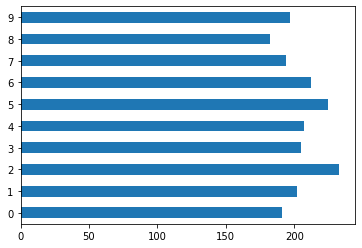

In [6]:
train['digit'].value_counts().sort_index().plot.barh()

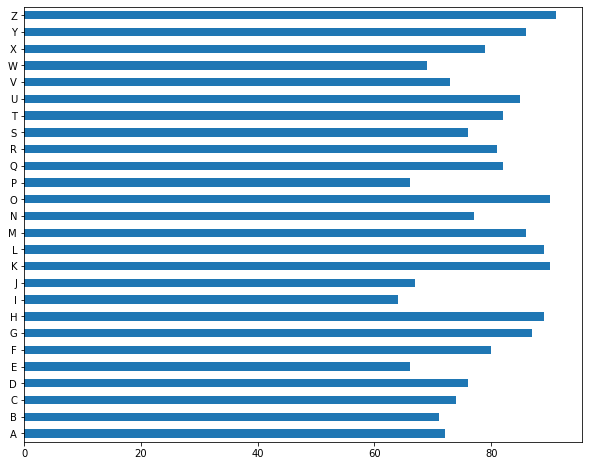

In [7]:
fig = plt.subplots(1,1,figsize=(10,8))
train['letter'].value_counts().sort_index().plot.barh()
plt.show()

In [8]:
train.isna().sum().sum()

0

## train, test 데이터 tensor화

In [9]:
x_train = train.iloc[:,3:]
x_test = test.iloc[:,2:]

In [10]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

## Train image확인

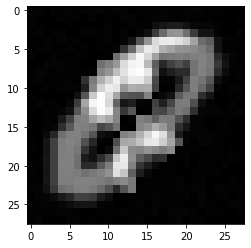

In [ ]:
a = np.random.randint(train.shape[0])

plt.imshow(x_train[a,:].reshape(28,28),cmap='gray')
plt.show()

##X_train, X_test 정규화

In [ ]:
x_train = x_train/255
x_test = x_test/255

x_train.shape, x_test.shape

((2048, 28, 28, 1), (20480, 28, 28, 1))

## y_train 설정

In [11]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = np.array(train['digit'])
print(y_train.shape)

(2048,)


## StratifiedKFold

In [12]:
from sklearn.model_selection import StratifiedKFold

sk=StratifiedKFold(n_splits=5, shuffle=False, random_state=42)

for train_idx, val_idx in sk.split(x_train,y_train):
    X_train, X_val = x_train[train_idx], x_train[val_idx]
    Y_train, Y_val = y_train[train_idx], y_train[val_idx]


In [13]:
X_train.shape, Y_train.shape

((1639, 28, 28, 1), (1639,))

In [14]:
X_val.shape,Y_val.shape

((409, 28, 28, 1), (409,))

In [39]:
y_train_lb = lb.fit_transform(Y_train)
y_val_lb = lb.fit_transform(Y_val)
print(y_train_lb.shape, y_val_lb.shape)

(1639, 10) (409, 10)


##Train data Agumentation

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator ##train data Agumentation

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=(-1,1),
    height_shift_range=(-1,1),
    zoom_range=0.1,
    horizontal_flip = False,
    vertical_flip = False
)

val_datagen=ImageDataGenerator()

In [51]:
train_generator = train_datagen.flow(X_train,y_train_lb,batch_size=16)
val_generator = val_datagen.flow(X_val,y_val_lb)

##Sample data Agumentation Visualization

In [42]:
from numpy import expand_dims

sample = X_train[100].copy()
sample = sample.reshape(1,28,28,1) ##sample = expand_dims(sample,0)
sample_generator = train_datagen.flow(sample, batch_size=8)


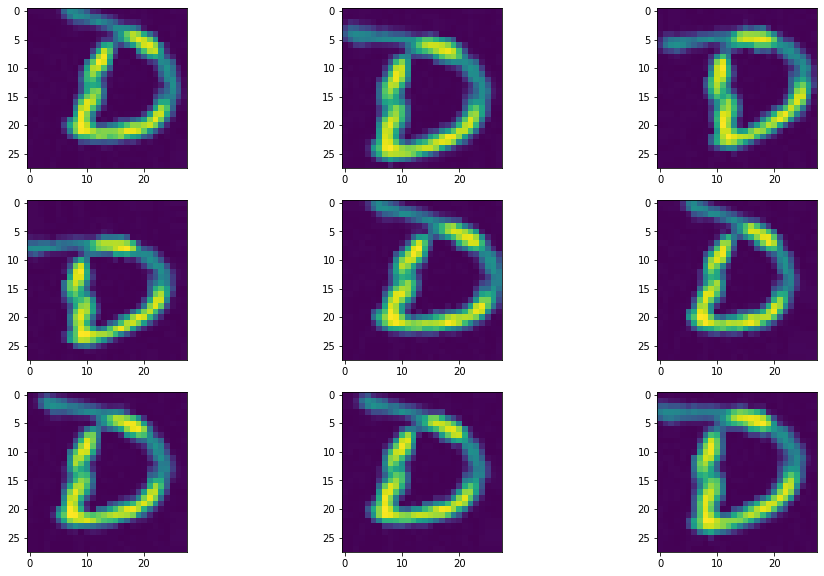

In [43]:
plt.figure(figsize=(16,10))

for i in range(9):

    plt.subplot(3,3,i+1)
    sample_batch = sample_generator.next()
    sample_image = sample_batch[0]
    plt.imshow(sample_image.reshape(28,28))

## Model

In [44]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau 

In [57]:
mc = ModelCheckpoint('computer_vision_best.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=5)
rlr =ReduceLROnPlateau(monitor='val_loss',mode='min', factor=0.1, verbose=1, patience=5, min_lr=0.0001)

callbacks = [mc,es,rlr]

In [55]:
model = Sequential()

model.add(Conv2D(16,(3,3), padding='same', input_shape=(28,28,1),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_19 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 32)       

In [58]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [59]:
history = model.fit_generator(train_generator, steps_per_epoch = len(X_train)/16, epochs=50, callbacks=callbacks, validation_data=val_generator,verbose=1 )

Epoch 1/50
102/102 [==============================] - 20s 180ms/step - loss: 2.8146 - acc: 0.1578 - val_loss: 2.6972 - val_acc: 0.2054

Epoch 00001: val_acc improved from -inf to 0.20538, saving model to computer_vision_best.h5
Epoch 2/50
102/102 [==============================] - 18s 176ms/step - loss: 2.1032 - acc: 0.2990 - val_loss: 1.6347 - val_acc: 0.4548

Epoch 00002: val_acc improved from 0.20538 to 0.45477, saving model to computer_vision_best.h5
Epoch 3/50
102/102 [==============================] - 18s 177ms/step - loss: 1.9124 - acc: 0.3518 - val_loss: 1.3335 - val_acc: 0.5428

Epoch 00003: val_acc improved from 0.45477 to 0.54279, saving model to computer_vision_best.h5
Epoch 4/50
102/102 [==============================] - 18s 177ms/step - loss: 1.6871 - acc: 0.4077 - val_loss: 1.1091 - val_acc: 0.6553

Epoch 00004: val_acc improved from 0.54279 to 0.65526, saving model to computer_vision_best.h5
Epoch 5/50
102/102 [==============================] - 18s 176ms/step - loss: 1.

##Test Data Predict

In [60]:
from tensorflow.keras.models import load_model

best_model=load_model("computer_vision_best.h5")

In [61]:
pred = model.predict(x_test) 

In [64]:
pred[0]

array([0.04436433, 0.0064338 , 0.06482992, 0.01063704, 0.01497672,
       0.02527237, 0.7485739 , 0.00101   , 0.08134706, 0.0025549 ],
      dtype=float32)

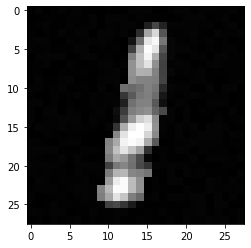

In [65]:
plt.imshow(x_test[0,:].reshape(28,28),cmap='gray')

In [71]:
pred_argmax = np.argmax(pred,axis=1)
print(pred_argmax.shape)

(20480,)


In [73]:
submission.iloc[:,1]=pred_argmax
submission.head(20)

,id,digit
0,2049,6
1,2050,9
2,2051,8
3,2052,0
4,2053,3
5,2054,8
6,2055,5
7,2056,3
8,2057,4
9,2058,4


In [74]:
submission.to_csv("computer_vision1.csv",index=False)